# Wingsapn Game Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('wingpan_game_data.csv')

In [3]:
data

,game_id,player,bird_total,bonus_cards,end_of_round_goals,eggs,food_on_cards,tucked_cards,total_points
0,1,Chris,28,10,11,20,0,6,75
1,1,Joanny,48,16,18,2,4,0,88
2,1,Sam,45,8,4,0,0,9,66
3,1,Brian,43,8,12,27,1,8,99
4,2,Ali,45,6,22,25,0,11,109
...,...,...,...,...,...,...,...,...,...
57,16,Joanny,20,3,6,7,0,6,42
58,17,Chris,37,9,11,12,0,7,76
59,17,Joanny,33,0,21,22,0,8,84
60,17,Doug,33,2,11,21,1,2,70


In [4]:
# Checking that the scores were added up correctly

data['calc_total_points'] = data[['bird_total','bonus_cards','end_of_round_goals','eggs','food_on_cards','tucked_cards']].sum(axis=1)

In [5]:
data.loc[data['total_points'] != data['calc_total_points']]

,game_id,player,bird_total,bonus_cards,end_of_round_goals,eggs,food_on_cards,tucked_cards,total_points,calc_total_points
7,2,Chris,40,10,3,19,0,6,77,78
27,8,Chris,34,6,12,20,2,4,76,78
28,8,Joanny,24,0,18,19,0,6,57,67
45,13,Dom,20,0,8,4,2,14,50,48


In [6]:
# cleaning up miscalculations

data.loc[data['total_points'] != data['calc_total_points'], 'total_points'] = data['calc_total_points']

In [7]:
clean_data = data.drop(columns=['calc_total_points'])

In [8]:
clean_data

,game_id,player,bird_total,bonus_cards,end_of_round_goals,eggs,food_on_cards,tucked_cards,total_points
0,1,Chris,28,10,11,20,0,6,75
1,1,Joanny,48,16,18,2,4,0,88
2,1,Sam,45,8,4,0,0,9,66
3,1,Brian,43,8,12,27,1,8,99
4,2,Ali,45,6,22,25,0,11,109
...,...,...,...,...,...,...,...,...,...
57,16,Joanny,20,3,6,7,0,6,42
58,17,Chris,37,9,11,12,0,7,76
59,17,Joanny,33,0,21,22,0,8,84
60,17,Doug,33,2,11,21,1,2,70


In [9]:
clean_data['win'] = clean_data.groupby('game_id')['total_points'].transform('max') == clean_data['total_points']

In [10]:
clean_data['player_count'] = clean_data.groupby(['game_id'])['player'].transform('nunique')

In [13]:
clean_data

,game_id,player,bird_total,bonus_cards,end_of_round_goals,eggs,food_on_cards,tucked_cards,total_points,win,player_count
0,1,Chris,28,10,11,20,0,6,75,False,4
1,1,Joanny,48,16,18,2,4,0,88,False,4
2,1,Sam,45,8,4,0,0,9,66,False,4
3,1,Brian,43,8,12,27,1,8,99,True,4
4,2,Ali,45,6,22,25,0,11,109,True,4
...,...,...,...,...,...,...,...,...,...,...,...
57,16,Joanny,20,3,6,7,0,6,42,False,3
58,17,Chris,37,9,11,12,0,7,76,False,4
59,17,Joanny,33,0,21,22,0,8,84,True,4
60,17,Doug,33,2,11,21,1,2,70,False,4


In [14]:
clean_data.describe()

,game_id,bird_total,bonus_cards,end_of_round_goals,eggs,food_on_cards,tucked_cards,total_points,player_count
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.00000
mean,9.016129,35.177419,6.306452,11.806452,15.854839,1.516129,5.774194,76.435484,3.83871
std,5.107025,8.810434,4.418993,4.626505,6.588233,2.101849,4.343525,13.904382,0.77234
min,1.000000,15.000000,0.000000,3.000000,0.000000,0.000000,0.000000,34.000000,2.00000
25%,4.250000,30.000000,3.000000,8.250000,10.000000,0.000000,2.000000,70.000000,3.25000
50%,9.500000,34.500000,6.000000,12.000000,16.000000,1.000000,5.500000,76.500000,4.00000
75%,13.000000,40.000000,8.000000,15.000000,20.000000,2.000000,8.000000,84.750000,4.00000
max,17.000000,56.000000,21.000000,22.000000,29.000000,10.000000,23.000000,109.000000,5.00000


### Point Distributions

In [15]:
cols = ['bird_total', 'bonus_cards', 'end_of_round_goals', 'eggs', 'food_on_cards', 'tucked_cards', 'total_points']

In [16]:
df_melted = clean_data[cols].melt(var_name='Metric', value_name='Value')

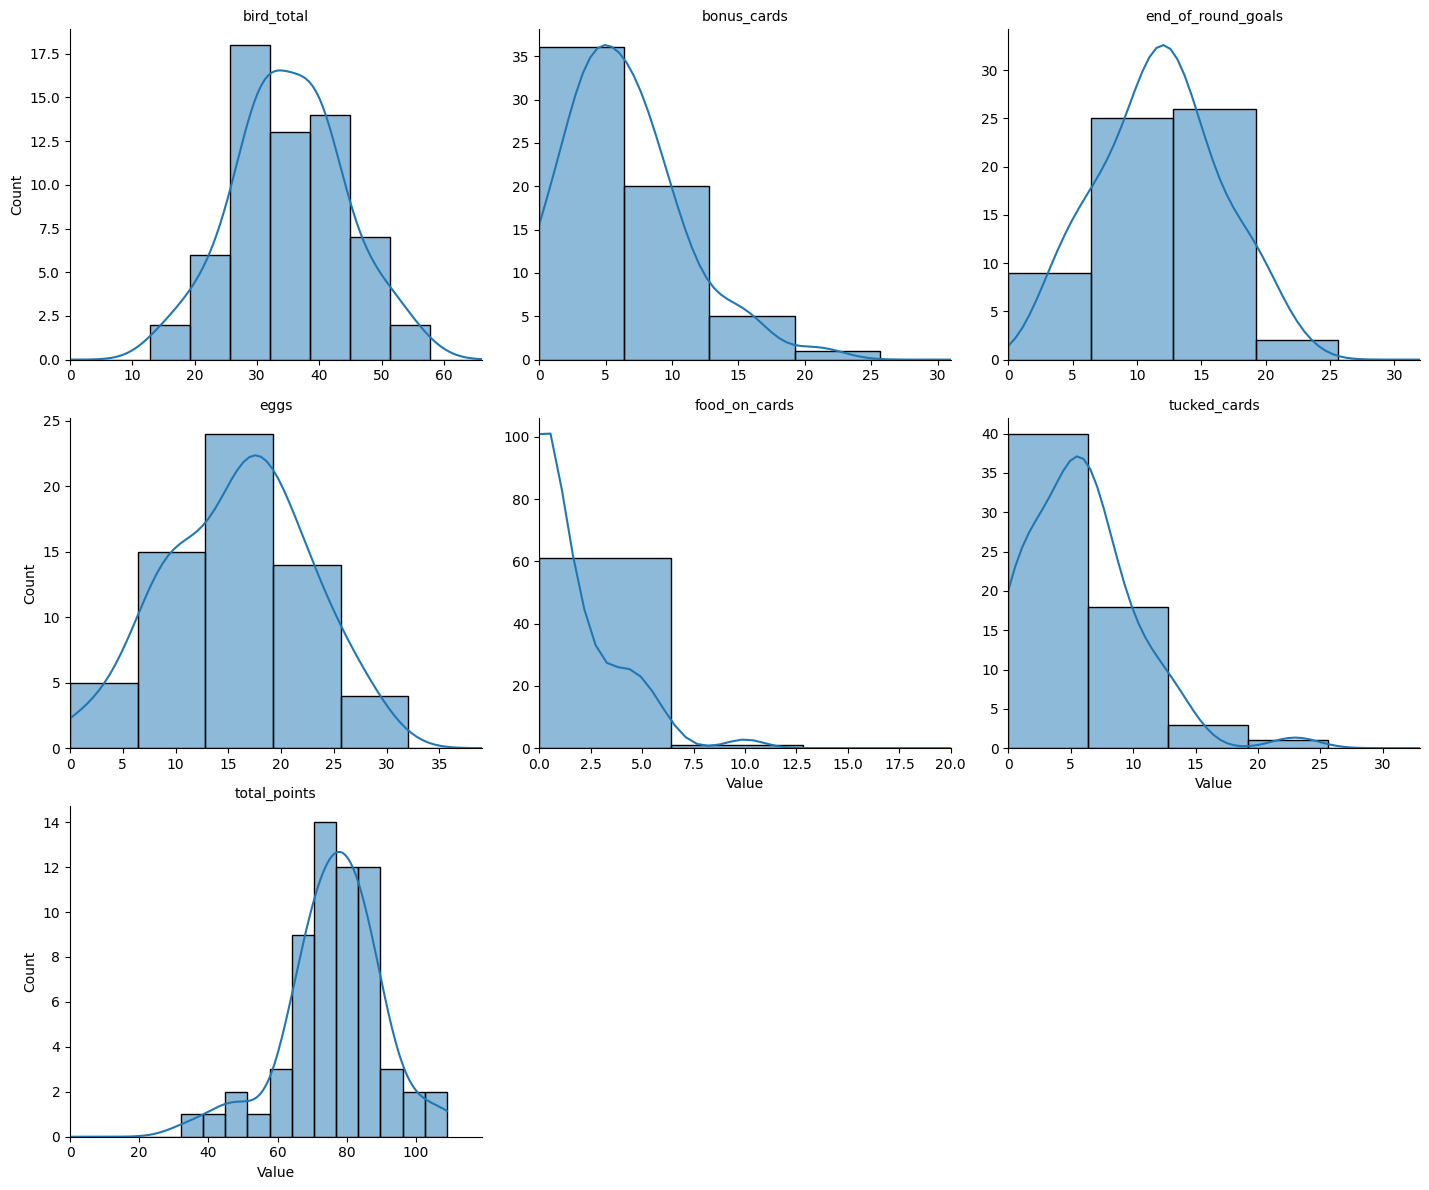

In [17]:
plot = sns.displot(
    data=df_melted,
    x='Value',
    col='Metric',
    col_wrap=3,
    kde=True,
    facet_kws={'sharex': False, 'sharey': False},
    height=4,
    aspect=1.2
)


for ax, metric in zip(plot.axes.flat, df_melted['Metric'].unique()):
    metric_data = df_melted[df_melted['Metric'] == metric]['Value']
    ax.set_xlim(0, metric_data.max() + 10)


plot.set_titles("{col_name}")
plt.tight_layout()
plt.show()

### Correlation Analysis

In [19]:
numeric_data = clean_data.iloc[:, 2:]

In [20]:
corr_matrix = numeric_data.corr()
corr_matrix

,bird_total,bonus_cards,end_of_round_goals,eggs,food_on_cards,tucked_cards,total_points,win,player_count
bird_total,1.000000,0.155638,0.015737,0.051005,0.017106,-0.202845,0.651732,0.070265,0.240371
bonus_cards,0.155638,1.000000,-0.060398,-0.274361,0.106242,-0.125304,0.243254,0.047762,0.134802
end_of_round_goals,0.015737,-0.060398,1.000000,0.473970,0.064388,-0.127025,0.518145,0.427730,-0.201569
eggs,0.051005,-0.274361,0.473970,1.000000,-0.133012,0.075028,0.579986,0.312415,-0.056225
food_on_cards,0.017106,0.106242,0.064388,-0.133012,1.000000,-0.039099,0.141954,-0.065452,0.122812
tucked_cards,-0.202845,-0.125304,-0.127025,0.075028,-0.039099,1.000000,0.131404,0.225227,0.013399
total_points,0.651732,0.243254,0.518145,0.579986,0.141954,0.131404,1.000000,0.410517,0.124192
win,0.070265,0.047762,0.427730,0.312415,-0.065452,0.225227,0.410517,1.000000,-0.153763
player_count,0.240371,0.134802,-0.201569,-0.056225,0.122812,0.013399,0.124192,-0.153763,1.000000


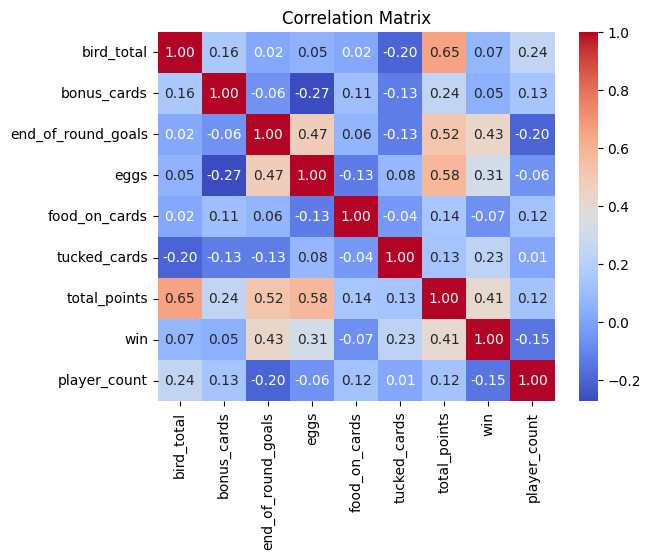

In [21]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()